This notebook generates violin plots and histograms for microscopy data from imaging condensates. 
Input files are CSVs that contain condensates picked using the specifications detailed in the paper methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from tqdm import tqdm
import pickle
import os

import socket
from tqdm import tqdm
from pandas import read_csv


In [2]:
import matplotlib.pylab as pylab
hfont = {'fontname':'Arial'}
params = {'legend.fontsize': 12,
          'figure.figsize': (3,2),
         'axes.labelsize': 12,
         'axes.titlesize':12,
         'xtick.labelsize':12,
         'ytick.labelsize':12,}
pylab.rcParams.update(params)
plt.rc('axes', labelsize=12, edgecolor='#231F20')
size = 1
plt.rcParams['axes.linewidth'] = size
plt.rcParams['xtick.major.width']=size
plt.rcParams['xtick.minor.width']=size
plt.rcParams['ytick.major.width']=size

plt.rcParams['xtick.major.size']=6 #tick lengths
plt.rcParams['xtick.minor.size']=6
plt.rcParams['ytick.major.size']=6
plt.rcParams['ytick.minor.size']=6

plt.rcParams['legend.edgecolor'] = '#231F20'
plt.rcParams['xtick.labelcolor'] = '#231F20'
plt.rcParams['ytick.labelcolor'] = '#231F20'
plt.rcParams['xtick.color'] = '#231F20'
plt.rcParams['ytick.color'] = '#231F20'

plt.rcParams['font.size'] = 12
plt.rcParams['font.sans-serif'] = 'Arial'
hfont = {'fontname':'Arial'}

In [ ]:
def categorize(label):
    for x, key in enumerate(ordered):
        if key in label:
            return columns_my_order[x]


#not used anymore, but kept for reference
def boxplotter(dataframe, columns_my_order, metric, labels=False):
    #fig, ax = plt.subplots(figsize=(10,5))
    for position, column in enumerate(columns_my_order):

        subset = dataframe[dataframe["newlabel"] == column]
        print(column, subset[metric].mean(), metric)
        print(column, 'number of droplets', len(subset[metric]))

        test = ax.boxplot(subset[subset['Mean']!= 255][metric], positions=[position], patch_artist=True, sym='', boxprops= dict(linewidth=1, color='black')
    , whiskerprops=dict(linewidth=1, color='black'))

        for patch, color in zip(test['boxes'], mycolors):
            patch.set_facecolor(mycolors[position])

    ax.tick_params(color='black', labelcolor='black')
    ax.set_xticks(range(position+1))
    if labels:
        ax.set_xticklabels(labels, fontsize=12)
    else:   
        ax.set_xticklabels(columns_my_order, fontsize=12) #for my figures this is the standard fontsize
    ax.set_xticklabels([])
    ax.set_xlim(xmin=-0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.rcParams['axes.linewidth'] = 1
    ax.xaxis.set_tick_params(width=1, length=6)
    ax.yaxis.set_tick_params(width=1, length=6)

    for spine in ax.spines.values():
        spine.set_edgecolor('black')


def violinplotter(dataframe, columns_my_order, metric, labels=False):
    #fig, ax = plt.subplots(figsize=(10,5))
    for position, column in enumerate(columns_my_order):

        subset = dataframe[dataframe["newlabel"] == column]
        print(column, subset[metric].mean(), metric)
        print(column, 'number of droplets', len(subset[metric]))

        test = ax.violinplot(subset[subset['Mean']!= 255][metric], positions=[position],  showmeans=False, showmedians=True)

        for pc in test['bodies']:
            pc.set_facecolor(mycolors[position])
            pc.set_alpha(1)


        for partname in ('cbars','cmins','cmaxes','cmedians'):
            vp = test[partname]
            vp.set_edgecolor('black')
            vp.set_linewidth(1)


    ax.tick_params(color='black', labelcolor='black')
    ax.set_xticks(range(position+1))
    if labels:
        ax.set_xticklabels(labels, fontsize=12)
    else:   
        ax.set_xticklabels(columns_my_order, fontsize=12) #for my figures this is the standard fontsize
    ax.set_xticklabels([])
    ax.set_xlim(xmin=-0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.rcParams['axes.linewidth'] = 1
    ax.xaxis.set_tick_params(width=1, length=6)
    ax.yaxis.set_tick_params(width=1, length=6)

    for spine in ax.spines.values():
        spine.set_edgecolor('black')





def intensity_histogrammer(dataframe, ordered, binrange, labels, density, mycolors, db):

    for x, key in enumerate(ordered):
        fig = plt.figure(figsize=(1.75, 0.5))
        bounds = np.array([-0.5, .5, 1.5])
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        fig.add_axes(ax)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
        subset = dataframe[dataframe["Label"].str.contains(key)]
        #subset = dataframe[dataframe["newlabel"] == key]
        print(key, len(subset), 'mean:', subset[subset['Area'] > 0]['Mean'].mean())
        
        binnumber = int(len(subset)/10) #set the bin number to be 10% of the total observations 
        if binnumber < 7:
            binnumber = 7
            
        elif binnumber > 40: binnumber = 40
        
        binwidth = int((binrange[1] - binrange[0])/binnumber) #set the width of the bins according to the range

        if binwidth < 1:
            binwidth = 1

        plt.hist(subset[subset['Area'] > 0]['Mean'], bins=range(binrange[0], binrange[1], binwidth), density=density, label=labels[x], color=mycolors[x], alpha=1)
        #plt.hist(subset[subset['Area'] > 0]['Area'], bins=range(binrange[0], binrange[1], binwidth), density=density, label=labels[x], color=mycolors[x], alpha=1)
        plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
        ax.tick_params(color='black', labelcolor='black')
        #plt.savefig(db+key+'_intensityhistogram.pdf', dpi=300, bbox_inches='tight')


from scipy import stats
def significance(dataframe, label1, label2, metric):

    subset1 = dataframe[dataframe["newlabel"] == label1]
    subset2 = dataframe[dataframe["newlabel"] == label2]

    print('correlated ' + metric, stats.ttest_ind(subset1[metric].values, subset2[metric].values))



ATP 7724.740107526881 Mean
ATP number of droplets 93
17nM 7472.278181818182 Mean
17nM number of droplets 88
35nM 7360.228865 Mean
35nM number of droplets 200
70nM 4967.552738515901 Mean
70nM number of droplets 283
140nM 2935.3106906077346 Mean
140nM number of droplets 181
ADP 752.849435659411 Mean
ADP number of droplets 3124
140nM ACF 670.9153316326531 Mean
140nM ACF number of droplets 392
280nM ACF 703.400975369458 Mean
280nM ACF number of droplets 203


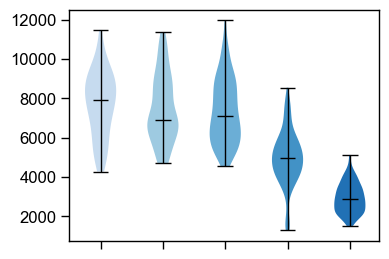

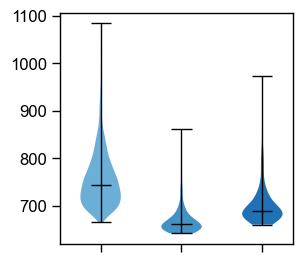

In [ ]:
#Fig2 and FigS6

#from 240130, same as 230829, for Fig2
atp_lowconc = pd.read_csv(db+'acf_atp_lowconc_Results.csv')
atp_lowconc = atp_lowconc[atp_lowconc['Mean'] > 255] #the mask has intensities of 255, which is the background
atp_lowconc = atp_lowconc.reset_index()


#240130 for Fig2
columns_my_order = ['ATP', '17nM', '35nM', '70nM', '140nM']
ordered = ['L3_control', 'L4_17nmacf', 'L5_35nmACF', 'L6_70nmACF', 'L7_140nmACF']
mycolors = ['#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5']
atp_lowconc['newlabel'] = atp_lowconc['Label'].apply(categorize)

#db = '/Users/cmoore/Dropbox (Gladstone)/RemodelingPhaseSepPaper/Review(working)/Plots/Fig2/'
fig, ax = plt.subplots(figsize=(4,3))
violinplotter(atp_lowconc, ['ATP', '17nM', '35nM', '70nM', '140nM'], 'Mean', ['ATP', '17nM', '35nM', '70nM', '140nM'])
#plt.savefig(db+'atpTitration240130_intensity'+'_violinplot.pdf', dpi=300, bbox_inches='tight')


#ADP 6D, 230902 for Fig S6
 
adp1 = pd.read_csv(db+'acf_adp_Results.csv')
adp2 = pd.read_csv(db+'adp_6D_handpicked_Results.csv') 
adp = pd.concat([adp1, adp2])
adp_good = adp[adp['Mean'] > 255]
adp = adp_good.reset_index()

columns_my_order = ['ADP',  '140nM ACF', '280nM ACF']
ordered = ['D12', 'D19', 'D20']
mycolors = ['#6baed6','#4292c6','#2171b5']
adp['newlabel'] = adp['Label'].apply(categorize)

#db = '/Users/cmoore/Dropbox (Gladstone)/RemodelingPhaseSepPaper/Review(working)/Plots/FigS6/'
fig, ax = plt.subplots(figsize=(3,3))
violinplotter(adp, ['ADP',  '140nM ACF', '280nM ACF'], 'Mean')
#plt.savefig(db+'adp230902_intensity'+'_violinplot.pdf', dpi=300, bbox_inches='tight')


N3_prespike 4356.3169375 Mean
N3_prespike number of droplets 48
N3_postspike 322.4118842105263 Mean
N3_postspike number of droplets 95
N4_prespike 4454.162036885246 Mean
N4_prespike number of droplets 244
N4_postspike 1097.4367753623187 Mean
N4_postspike number of droplets 276
correlated Mean TtestResult(statistic=31.34731331392832, pvalue=2.0211071453809062e-65, df=141.0)
correlated Mean TtestResult(statistic=67.1559655071423, pvalue=8.314179743829147e-258, df=518.0)


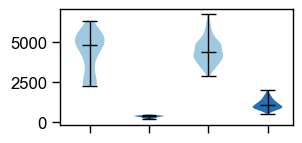

In [5]:
#Fig5 and FigS15 (area), FigS16, FigS17 (area) spike in exps 

db1 = '/Users/cmoore/Dropbox (Gladstone)/Phasing_Assays/for_paper_figure4/'
db2 = '/Users/cmoore/Dropbox (Gladstone)/Phasing_Assays/for_paper_figure5/lowATP_spike/'
db3 = '/Users/cmoore/Dropbox (Gladstone)/Phasing_Assays/for_paper_figure5/highATP_spike/'
dataframe1 = pd.read_csv(db1+'fig4_Results.csv')
dataframe2 = pd.read_csv(db2+'fig5_lowATP_intensity_Results.csv')
dataframe3 = pd.read_csv(db3+'fig5_highATP_intensity_Results.csv')

db = '/Users/cmoore/Dropbox (Gladstone)/Phasing_3_Starting August2024/241024_rsclowhighatp/to_threshold/'
fifteennucs_1 = pd.read_csv(db+'241024_RSC350spike_Results.csv')
fifteennucs = pd.concat([dataframe1, dataframe2,dataframe3, fifteennucs_1])
fifteennucs = fifteennucs[fifteennucs['Mean'] != 255]
fifteennucs = fifteennucs.reset_index()

mycolors = ['#9ecae1','#2171b5','#9ecae1','#2171b5', '#9ecae1', '#2171b5', '#9ecae1','#2171b5', '#9ecae1', '#2171b5']

#size match from 1-3um radius for the original data since radius=2.5 is the distance analysis
#fifteennucs = fifteennucs[(fifteennucs['Area'] >= 3.14) & (fifteennucs['Area'] <= 28.27)] #for original data

#size match from 1-2um radius for rebuttal data since radius=1.5 for distance analysis 
fifteennucs = fifteennucs[(fifteennucs['Area'] >= 3.14) & (fifteennucs['Area'] <= 12.5)] #for rebuttlal

labels = columns_my_order= ['H16', 'H17', 'H18_prespike', 'H18_postspike',  'H20_prespike', 'H20_postspike', 'N3_prespike', 'N3_postspike', 'N4_prespike', 'N4_postspike']
ordered = ['H16', 'H17','H18_prespike', 'H18_postspike','H20_prespike', 'H20_postspike', 'N3_prespike', 'N3_postspike', 'N4_prespike', 'N4_postspike']

fifteennucs['newlabel'] = fifteennucs['Label'].apply(categorize)

db = '/Users/cmoore/Dropbox (Gladstone)/RemodelingPhaseSepPaper/Review(working)/Plots/Fig5_new/'

#For Fig5
# fig, ax = plt.subplots(figsize=(3,1.5))
# violinplotter(fifteennucs, [ 'H18_prespike', 'H18_postspike', 'H20_prespike', 'H20_postspike'], 'Mean')
# plt.savefig(db + 'Fig5_ogspike_filter_Areaviolinplot.pdf', dpi=300, bbox_inches='tight')

#For FigS16 rebuttal

fig, ax = plt.subplots(figsize=(3,1.5))
violinplotter(fifteennucs, ['N3_prespike', 'N3_postspike', 'N4_prespike', 'N4_postspike'], 'Mean')
#plt.savefig(db + 'Fig5_N3N4_filter_Meanviolinplot.pdf', dpi=300, bbox_inches='tight')


label1 = 'N3_prespike'
label2 = 'N3_postspike' #yes sig ***
significance(fifteennucs, label1, label2, 'Mean')

label1 = 'N4_prespike'
label2 = 'N4_postspike' #yes sig ***
significance(fifteennucs, label1, label2, 'Mean')

4mM 5923.3670487804875 Mean
4mM number of droplets 287
2mM 5171.723936224489 Mean
2mM number of droplets 392
1mM 5983.592391608392 Mean
1mM number of droplets 143
0.5mM 5932.9083603351955 Mean
0.5mM number of droplets 358
0.25mM 5004.704876984128 Mean
0.25mM number of droplets 504
0.1mM 5981.294698492462 Mean
0.1mM number of droplets 199
0mM 6492.4241956521755 Mean
0mM number of droplets 92


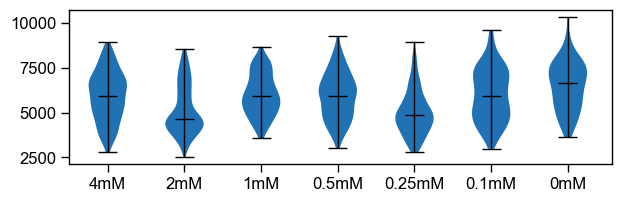

In [249]:
#FigS13 ATP titration 

db = '/Users/cmoore/Dropbox (Gladstone)/Phasing_3_Starting August2024/241115_atptitration/atp_titration/'
df_acf = pd.read_csv(db+'241115_atptitration_Results.csv')
df_acf = df_acf[df_acf['Mean'] != 255]

mycolors = ['#2171b5','#2171b5','#2171b5','#2171b5','#2171b5','#2171b5','#2171b5','#2171b5']
ordered = [ 'F11', 'F12', 'F13','F14','F15', 'F16', 'F17' ]
labels = [  '4mM', '2mM', '1mM', '0.5mM', '0.25mM', '0.1mM', '0mM']

columns_my_order = [  '4mM', '2mM', '1mM', '0.5mM', '0.25mM', '0.1mM', '0mM']

df_acf['newlabel'] = df_acf['Label'].apply(categorize)

fig, ax = plt.subplots(figsize=(7,2))
violinplotter(df_acf, columns_my_order, 'Mean')

db = '/Users/cmoore/Dropbox (Gladstone)/RemodelingPhaseSepPaper/Review(working)/Plots/FigS13/'
plt.savefig(db+'ATP_titration'+'_violinplot.pdf', dpi=300, bbox_inches='tight')

cutoff: 0
Low atp distance TtestResult(statistic=-5.55019439028701, pvalue=2.123122114226617e-07, df=106.0)
high atp distance TtestResult(statistic=-4.8374656415449255, pvalue=2.301456194136353e-06, df=250.0)
low v high distance TtestResult(statistic=-0.05009514042196178, pvalue=0.9600887652379142, df=237.0)
number of droplets: 78
max: [5.96560082 5.96560082]
[3.00884925 3.00884925]
number of droplets: 30
max: [6.71181722 6.71181722]
[4.37012029 4.37012029]
number of droplets: 43
max: [7.98445866 7.98445866]
[2.11385898 2.11385898]
number of droplets: 209
max: [10.54919147 10.54919147]
[4.45584979 4.45584979]
cutoff: 2
Low atp distance TtestResult(statistic=-6.222658025767061, pvalue=1.2767013985479614e-08, df=96.0)
high atp distance TtestResult(statistic=-5.719596959508034, pvalue=4.7094412724490564e-08, df=170.0)
low v high distance TtestResult(statistic=-2.7698150509221877, pvalue=0.006217734879911127, df=174.0)
number of droplets: 70
max: [5.96560082 5.96560082]
[3.05427394 3.05427

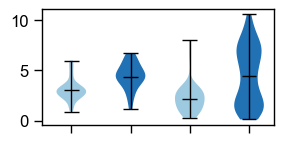

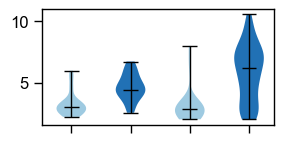

In [ ]:
#FigS13 og data distance analysis 
import glob
def df_maker(csv_files):
    # Create an empty dataframe to store the combined data
    combined_df = pd.DataFrame()

    # Loop through each CSV file, read it, and append to the combined dataframe
    for count, csv_file in enumerate(csv_files):
        df = pd.read_csv(csv_file)
        combined_df = pd.concat([combined_df, df[3:]], ignore_index=True)
    return combined_df

def motion_boxplotter(dataframe, cutoff):
    use = dataframe

    use = use[use['NUMBER_SPOTS'].astype('int') >= 20] #only use droplets that were tracked for 20 or more frames (max is 21 frames)
    
    plotthis_almost = use[use['TOTAL_DISTANCE_TRAVELED'].astype('float') >= cutoff]

    plotthis = plotthis_almost['TOTAL_DISTANCE_TRAVELED'].astype('float')
    #print('max distance:', plotthis.max())
    return plotthis

dr = '/Users/cmoore/Gladstone Dropbox/Camille Moore/phasing_2/240103_rscspikeinHighATP/trackmate_250201/'

#Get a list of all CSV files in the directory
csv_files = glob.glob(dr+'H18_prespike'+'*.csv') 
H18_prespike_df = df_maker(csv_files)

csv_files = glob.glob(dr+'H20_prespike'+'*.csv') 
H20_prespike_df = df_maker(csv_files)

csv_files = glob.glob(dr+'H18_postspike'+'*.csv') 
H18_postspike_df = df_maker(csv_files)

csv_files = glob.glob(dr+'H20_postspike'+'*.csv') 
H20_postspike_df = df_maker(csv_files)


mycolors = ['#9ecae1', '#2171b5', '#9ecae1', '#2171b5']

for cutoff in [0, 2]:
    columns_my_order = {}
    columns_my_order['Pre-spike, low ATP'] = motion_boxplotter(H18_prespike_df, cutoff)
    columns_my_order['Post spike, low ATP'] = motion_boxplotter(H18_postspike_df, cutoff)
    columns_my_order['Pre-spike, high ATP'] = motion_boxplotter(H20_prespike_df, cutoff)
    columns_my_order['Post spike, high ATP'] = motion_boxplotter(H20_postspike_df, cutoff)
    
    print('cutoff:', cutoff)
    print('Low atp distance', stats.ttest_ind(columns_my_order['Pre-spike, low ATP'], columns_my_order['Post spike, low ATP']))
    print('high atp distance', stats.ttest_ind(columns_my_order['Pre-spike, high ATP'], columns_my_order['Post spike, high ATP']))
    print('low v high distance', stats.ttest_ind(columns_my_order['Post spike, low ATP'], columns_my_order['Post spike, high ATP']))

    order = ['Pre-spike, low ATP', 'Post spike, low ATP', 'Pre-spike, high ATP', 'Post spike, high ATP']

    fig, ax = plt.subplots(figsize=(3,1.5))
    for position, column in enumerate(order):

        print('number of droplets: %s' % len(columns_my_order[column]))

        test = ax.violinplot(columns_my_order[column], positions=[position],  showmeans=False, showmedians=True)

        print('max:', test['cmaxes'].get_segments()[0][:, 1])
        print(test['cmedians'].get_segments()[0][:, 1])

        for pc in test['bodies']:
            pc.set_facecolor(mycolors[position])
            pc.set_alpha(1)


        for partname in ('cbars','cmins','cmaxes','cmedians'):
            vp = test[partname]
            vp.set_edgecolor('black')
            vp.set_linewidth(1)

    ax.tick_params(color='black', labelcolor='black')
    ax.set_xticks(range(position+1))
    ax.set_xticklabels([])
    ax.set_xlim(xmin=-0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.rcParams['axes.linewidth'] = 1
    ax.xaxis.set_tick_params(width=1, length=6)
    ax.yaxis.set_tick_params(width=1, length=6)

    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        
    db = '/Users/cmoore/Dropbox (Gladstone)/RemodelingPhaseSepPaper/Review(working)/Plots/Fig5_new/'
    #plt.savefig(db+'H18H20_distance_2.0cutoff'+'_violinplot.pdf', dpi=300, bbox_inches='tight')